In [3]:
import pandas as pd


In [4]:
label = pd.read_excel("/Users/guanxi/Desktop/Final Project/label.xlsx")
feature = pd.read_excel("/Users/guanxi/Desktop/Final Project/feature.xlsx")

In [5]:
label = label.drop(columns=["Unnamed: 0"])

In [6]:
feature = feature.drop(columns=["Unnamed: 0"])

In [7]:
data0 = pd.merge(label,feature,how="inner",on="FIPS")

In [8]:
data = data0.drop(data0[data0["GROUP"] == 7].index)

In [9]:
data.columns.tolist()

['FIPS',
 'GROUP',
 'sustenance',
 'entertainment',
 'health',
 'financial',
 'edu',
 'Average Commute to Work (In Min)',
 '% Population 1 Year and Over in Households in the United States: Householder Lived in Renter-Occupied Housing Units: Moved From Abroad',
 '% Population 1 Year and Over in Households in the United States: Householder Lived in Renter-Occupied Housing Units: Moved From Different County WithIn Same State',
 '% Population 1 Year and Over in Households in the United States: Householder Lived in Renter-Occupied Housing Units: Moved From Different State',
 '% Population 1 Year and Over in Households in the United States: Householder Lived in Renter-Occupied Housing Units: Moved WithIn Same County',
 '% Workers 16 Years and Over: Bicycle',
 '% Workers 16 Years and Over: Car, Truck, or Van',
 '% Workers 16 Years and Over: Public Transportation (Includes Taxicab)',
 '% Workers 16 Years and Over: Walked']

In [10]:
X = data[['sustenance',
          'entertainment',
          'health',
          'financial',
          'edu',
          'Average Commute to Work (In Min)',
          '% Population 1 Year and Over in Households in the United States: Householder Lived in Renter-Occupied Housing Units: Moved From Abroad',
          '% Population 1 Year and Over in Households in the United States: Householder Lived in Renter-Occupied Housing Units: Moved From Different County WithIn Same State',
          '% Population 1 Year and Over in Households in the United States: Householder Lived in Renter-Occupied Housing Units: Moved From Different State',
          '% Population 1 Year and Over in Households in the United States: Householder Lived in Renter-Occupied Housing Units: Moved WithIn Same County',
          '% Workers 16 Years and Over: Bicycle',
          '% Workers 16 Years and Over: Car, Truck, or Van',
          '% Workers 16 Years and Over: Public Transportation (Includes Taxicab)',
          '% Workers 16 Years and Over: Walked']] 

In [11]:
X.fillna(0, inplace=True)


/var/folders/nt/g8pbq5q93kx0tly83_qxb1040000gn/T/ipykernel_924/3062484852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [12]:
y = data["GROUP"]

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
svm_model = SVC(kernel='rbf', decision_function_shape='ovr')
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.6981891348088531


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [16]:
import numpy as np

# 打印测试集的唯一值
print("Unique values in y_test:", np.unique(y_test))

# 打印模型预测结果的唯一值
print("Unique values in svm_predictions:", np.unique(svm_predictions))


Unique values in y_test: [1 2 3 4 5 6]
Unique values in svm_predictions: [1 2]


In [18]:
print("Classification Report:")
print(classification_report(y_test, svm_predictions))

Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.90      0.79       601
           2       0.67      0.54      0.60       284
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        68
           6       0.00      0.00      0.00        27

    accuracy                           0.70       994
   macro avg       0.23      0.24      0.23       994
weighted avg       0.62      0.70      0.65       994



/Users/guanxi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/guanxi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/guanxi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.5905432595573441
Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.72      0.72       601
           2       0.51      0.46      0.49       284
           3       0.00      0.00      0.00         6
           4       0.07      0.12      0.09         8
           5       0.24      0.31      0.27        68
           6       0.05      0.04      0.04        27

    accuracy                           0.59       994
   macro avg       0.26      0.28      0.27       994
weighted avg       0.59      0.59      0.59       994



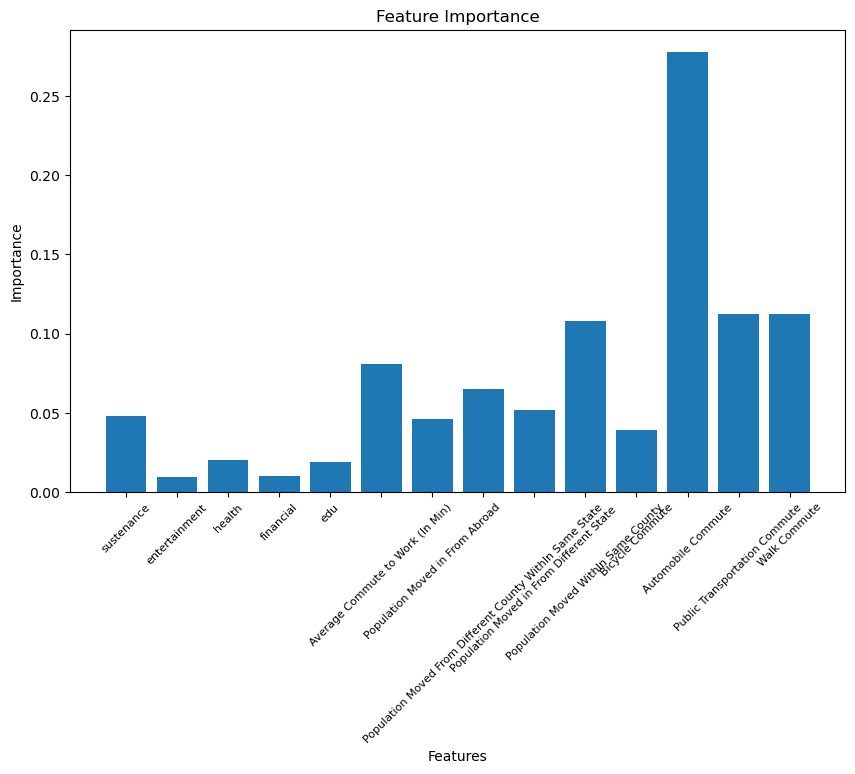

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 创建决策树模型
decision_tree_model = DecisionTreeClassifier(random_state=42)

# 训练模型
decision_tree_model.fit(X_train, y_train)

# 预测
tree_predictions = decision_tree_model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, tree_predictions)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test,tree_predictions ))

# 打印特征重要性
if hasattr(decision_tree_model, 'feature_importances_'):
    feature_importance = decision_tree_model.feature_importances_
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importance)), feature_importance, tick_label=X.columns)
    plt.title('Feature Importance')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=45,size=8)
    plt.show()


In [27]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.6961770623742455


In [28]:
# 打印模型预测结果的唯一值
print("Unique values in svm_predictions:", np.unique(rf_predictions))


Unique values in svm_predictions: [1 2 4 5]


In [29]:
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.88      0.79       601
           2       0.66      0.55      0.60       284
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         8
           5       0.38      0.09      0.14        68
           6       0.00      0.00      0.00        27

    accuracy                           0.70       994
   macro avg       0.29      0.25      0.26       994
weighted avg       0.65      0.70      0.66       994



/Users/guanxi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/guanxi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/guanxi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
X = X.rename(columns={"% Population 1 Year and Over in Households in the United States: Householder Lived in Renter-Occupied Housing Units: Moved From Abroad": 'Population Moved in From Abroad'})
X = X.rename(columns={"% Population 1 Year and Over in Households in the United States: Householder Lived in Renter-Occupied Housing Units: Moved From Different County WithIn Same State":"Population Moved From Different County WithIn Same State"})
X = X.rename(columns={"% Population 1 Year and Over in Households in the United States: Householder Lived in Renter-Occupied Housing Units: Moved From Different State":"Population Moved in From Different State "})
X = X.rename(columns={"% Population 1 Year and Over in Households in the United States: Householder Lived in Renter-Occupied Housing Units: Moved WithIn Same County":"Population Moved WithIn Same County"})
X = X.rename(columns={"% Workers 16 Years and Over: Bicycle":"Bicycle Commute"})
X = X.rename(columns={"% Workers 16 Years and Over: Car, Truck, or Van":"Automobile Commute"})
X = X.rename(columns={"% Workers 16 Years and Over: Public Transportation (Includes Taxicab)":"Public Transportation Commute"})
X = X.rename(columns={"% Workers 16 Years and Over: Walked":"Walk Commute"})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'sustenance'),
  Text(1, 0, 'entertainment'),
  Text(2, 0, 'health'),
  Text(3, 0, 'financial'),
  Text(4, 0, 'edu'),
  Text(5, 0, 'Average Commute to Work (In Min)'),
  Text(6, 0, 'Population Moved in From Abroad'),
  Text(7, 0, 'Population Moved From Different County WithIn Same State'),
  Text(8, 0, 'Population Moved in From Different State '),
  Text(9, 0, 'Population Moved WithIn Same County'),
  Text(10, 0, 'Bicycle Commute'),
  Text(11, 0, 'Automobile Commute'),
  Text(12, 0, 'Public Transportation Commute'),
  Text(13, 0, 'Walk Commute')])

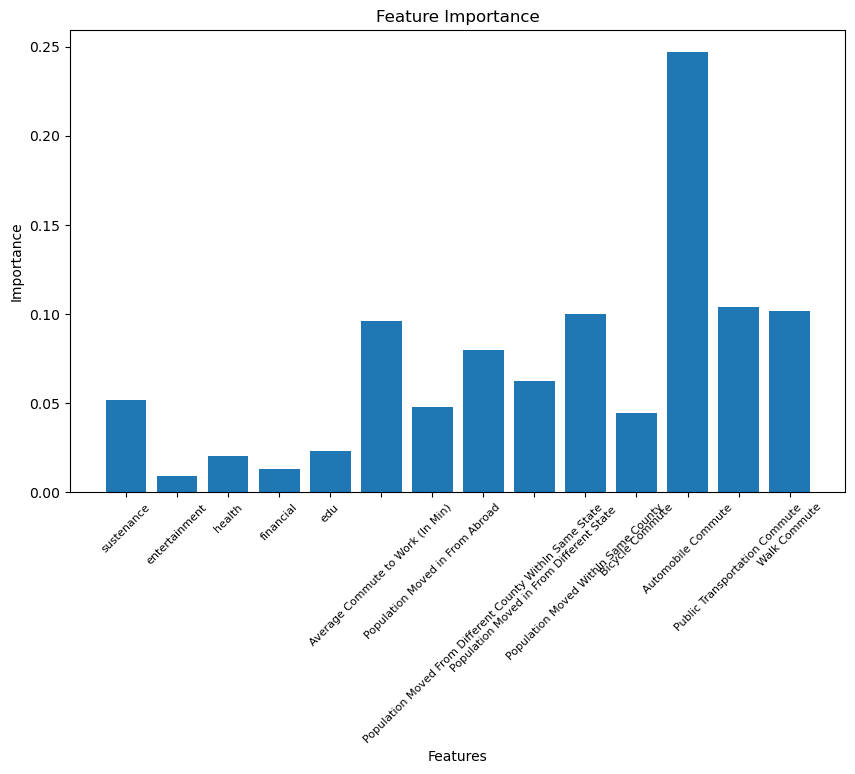

In [35]:
feature_importance = rf_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=X.columns)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45,size=8)

In [39]:
bagging_model = BaggingClassifier(estimator=None, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_predictions = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
print("Bagging Accuracy:", bagging_accuracy)


Bagging Accuracy: 0.6629778672032193


In [40]:
# 打印模型预测结果的唯一值
print("Unique values in svm_predictions:", np.unique(bagging_predictions))


Unique values in svm_predictions: [1 2 4 5 6]


In [41]:
print("Classification Report:")
print(classification_report(y_test, bagging_predictions))

Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.84      0.77       601
           2       0.57      0.50      0.53       284
           3       0.00      0.00      0.00         6
           4       0.25      0.12      0.17         8
           5       0.36      0.15      0.21        68
           6       0.25      0.04      0.06        27

    accuracy                           0.66       994
   macro avg       0.36      0.27      0.29       994
weighted avg       0.63      0.66      0.64       994



/Users/guanxi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/guanxi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/guanxi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


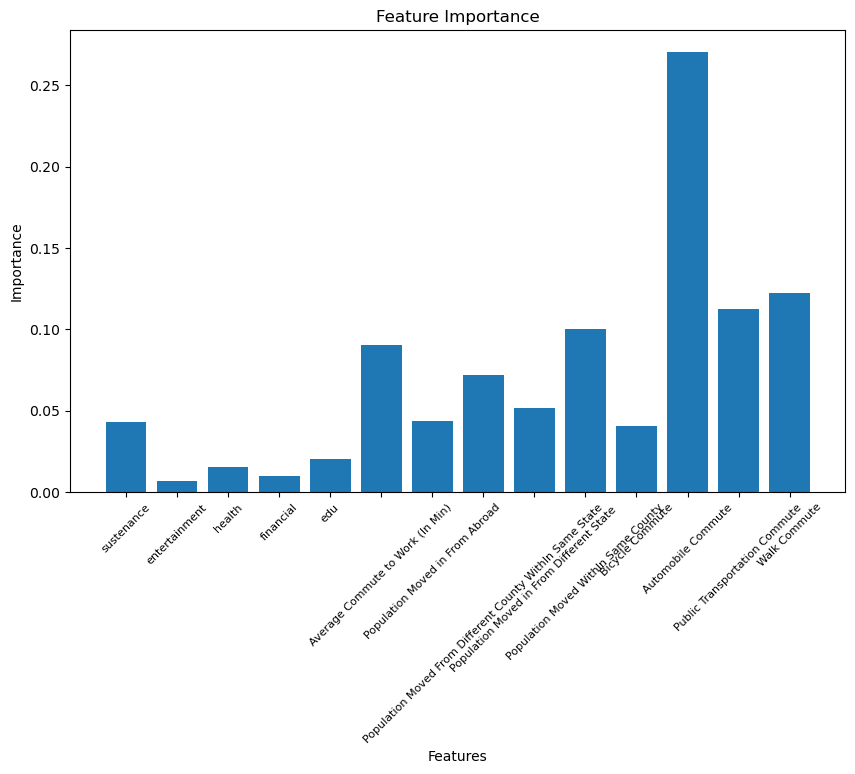

In [43]:
# 获取每个基分类器的特征重要性
feature_importances = np.zeros((len(bagging_model.estimators_), X_train.shape[1]))
for i, estimator in enumerate(bagging_model.estimators_):
    feature_importances[i] = estimator.feature_importances_

# 求平均值作为最终的特征重要性
average_feature_importances = np.mean(feature_importances, axis=0)

# 可视化特征重要性
plt.figure(figsize=(10, 6))
plt.bar(range(len(average_feature_importances)), average_feature_importances, tick_label=X.columns)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45,size=8)
plt.show()

Accuracy: 0.6961770623742455
Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.86      0.79       601
           2       0.64      0.56      0.60       284
           3       0.00      0.00      0.00         6
           4       0.20      0.12      0.15         8
           5       0.43      0.18      0.25        68
           6       0.50      0.04      0.07        27

    accuracy                           0.70       994
   macro avg       0.42      0.29      0.31       994
weighted avg       0.67      0.70      0.67       994



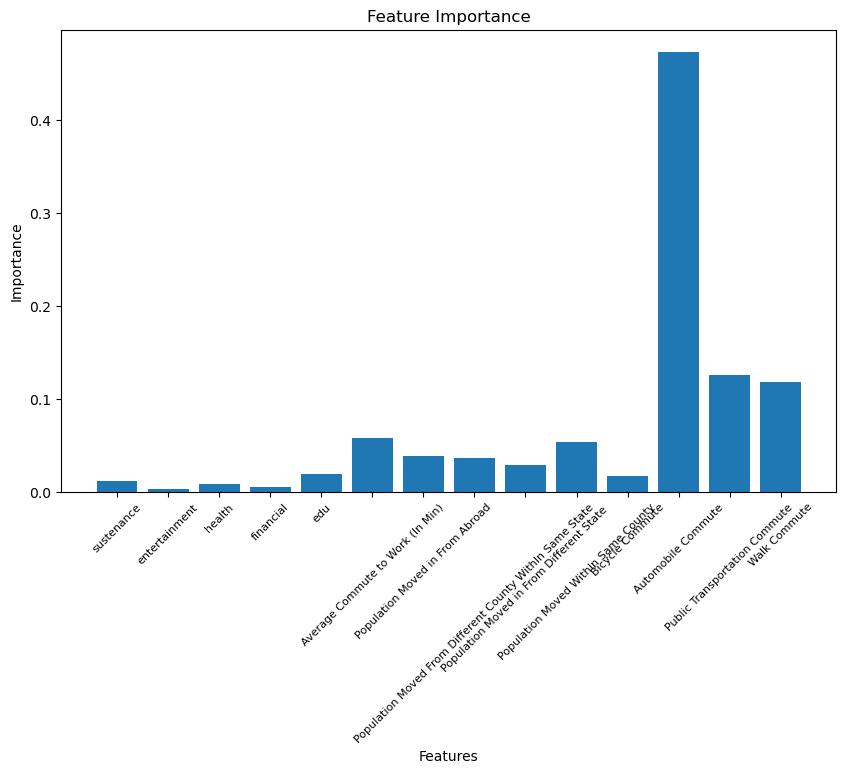

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 创建梯度提升决策树模型
gbdt_model = GradientBoostingClassifier(random_state=42)

# 训练模型
gbdt_model.fit(X_train, y_train)

# 预测
gbdt_predictions = gbdt_model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, gbdt_predictions)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, gbdt_predictions))

# 打印特征重要性
if hasattr(gbdt_model, 'feature_importances_'):
    feature_importance = gbdt_model.feature_importances_
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importance)), feature_importance, tick_label=X.columns)
    plt.title('Feature Importance')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=45,size=8)
    plt.show()
